# 《Python数据分析》第2次作业

### 说明：本次作业将使用好莱坞（2007-2011）的电影数据进行可视化。本次作业没有“标准答案”，请使用你认为最合理的方式进行可视化，并对结果进行描述和解读。可以使用matplotlib和（或）seaborn，或者其他你喜欢的Python可视化包。

### 第1题：请使用2011年的数据（即Most Profitable Hollywood Stories - US 2011.csv），对Domestic Gross这个变量的分布进行可视化，并对可视化结果进行简单描述。（2分）

评分要点：（1）可视化是否正确；（2）构图等可视化元素是否合适（包括但并不限于布局、尺度、颜色、标记与线条等，下同）；（3）可视化结果描述是否合理和到位。

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("data/Most Profitable Hollywood Stories - US 2011.csv")

#查看有什么属性
print(data.columns)
df = data

Index(['Film ', 'Lead Studio', 'Rotten Tomatoes %', 'Audience  score %',
       'Story', 'Genre', 'Number of Theatres in US Opening Weekend',
       'Box Office Average per US Cinema (Opening Weekend)', 'Domestic Gross',
       'Foreign Gross', 'Worldwide Gross', 'Budget', 'Profitability',
       'Opening Weekend', 'Oscar', 'Bafta', 'Source'],
      dtype='object')


In [236]:
#按照上述结果，决定横向比较不同类型（Genre）电影的Domestic Gross
#处理空值，把没有Genre值的电影归类到no-category
data.Genre.fillna('no-category',inplace=True)

#检查是否还有空值
print(data.Genre.isnull().any())

#Doemestic Gross 这样的数值取平均去填充没有意义（每部电影的票房去除宏观经济环境等本题不讨论的因素之外并不互相影响）
#所以直接把不符合规范的去除
try:
    data.drop(149,inplace=True)
    print(data['Domestic Gross'])
except:
    print('already delete the illegal value')


#接下来把每个类别中的domerstic gross 加总以进行横向比较


# 细分每个genre中的独立制作电影和商业制作电影，增加图表信息

#创建两个dict存放各个genre的domestic gross
gen_dict = {}
gen_dict_in = {}
cnt = 0
gen_avg = {}

genre = data.Genre.unique()

#run through every genre and sum up the domestic gross
for i in genre:
    x = data.groupby('Genre').get_group(i)
    x['Domestic Gross'] = pd.to_numeric(x['Domestic Gross'])
    try:
        x1 = x.groupby('Lead Studio').get_group('Independent')
    except:
        gen_dict[i] = x['Domestic Gross'].mean()
        gen_dict_in[i] = 0
        continue
    
    gen_dict[i] = x['Domestic Gross'].sum()
    gen_dict_in[i] = x1['Domestic Gross'].sum()
    gen_avg[i] = x['Domestic Gross'].mean()


False
already delete the illegal value


/var/folders/hc/96sg9mzd0sx0czqljw5xt9h40000gn/T/ipykernel_63584/3092479530.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Domestic Gross'] = pd.to_numeric(x['Domestic Gross'])
/var/folders/hc/96sg9mzd0sx0czqljw5xt9h40000gn/T/ipykernel_63584/3092479530.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Domestic Gross'] = pd.to_numeric(x['Domestic Gross'])
/var/folders/hc/96sg9mzd0sx0czqljw5xt9h40000gn/T/ipykernel_63584/3092479530.py:33: SettingWithCopyWarning: 
A value is trying to be set on a

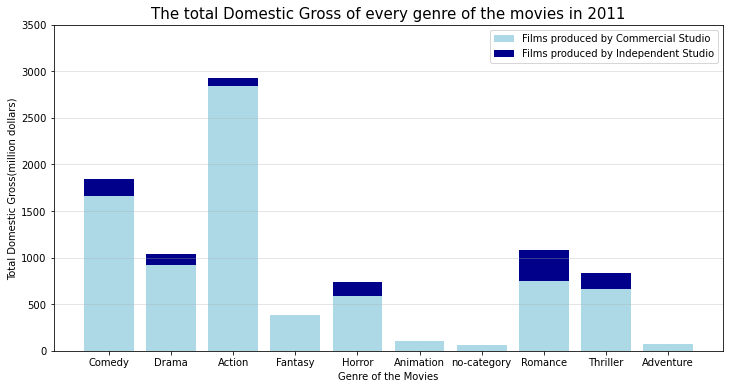

In [269]:
x = np.array(range(len(gen_dict)))

y = list(gen_dict.values())
y1 = list(gen_dict_in.values())
y2 = list(gen_avg.values())

plt.figure(figsize=(12,6))
plt.grid(True,axis='y',alpha=0.4)
plt.bar(x,y,align="center",color="lightblue",tick_label= list(gen_dict.keys()) ,alpha=1,label="Films produced by Commercial Studio")
plt.bar(x,y1,align="center",color="darkblue",bottom=y,label="Films produced by Independent Studio",alpha=1)
plt.legend()
plt.xlabel("Genre of the Movies")
plt.ylabel("Total Domestic Gross(million dollars)")
plt.ylim(0,3500)
plt.title('The total Domestic Gross of every genre of the movies in 2011',fontsize=15)
plt.show()


 **上图是资料集中各个类型电影在2011年美国国内总票房收入的直方图，我们可以看到大部分的票房是由商业电影贡献的；而票房收入最高的是动作片，其票房收益遠遠超越第二名的喜劇與第三名的動畫電影，其次是喜剧。除去没有归类的电影，票房最少的是冒险片。**


### 第2题：请使用2011年的数据（即Most Profitable Hollywood Stories - US 2011.csv），Number of Theatres in US Opening Weekend和Domestic Gross两个变量关系如何？请针对于它们之间的关系进行可视化，并对可视化结果进行简单描述。（2分）
温馨提示：可视化之前可能需要处理空缺值。处理空缺值的方式可自行定义并说明理由，言之成理即可。
评分要点：（1）处理缺失值的方式及理由；（2）可视化是否正确；（3）构图等可视化元素是否合适；（4）可视化结果描述是否合理和到位。

/var/folders/hc/96sg9mzd0sx0czqljw5xt9h40000gn/T/ipykernel_63584/142538453.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Number of Theatres in US Opening Weekend'][11] = a['Number of Theatres in US Opening Weekend'][11].replace(',',"")


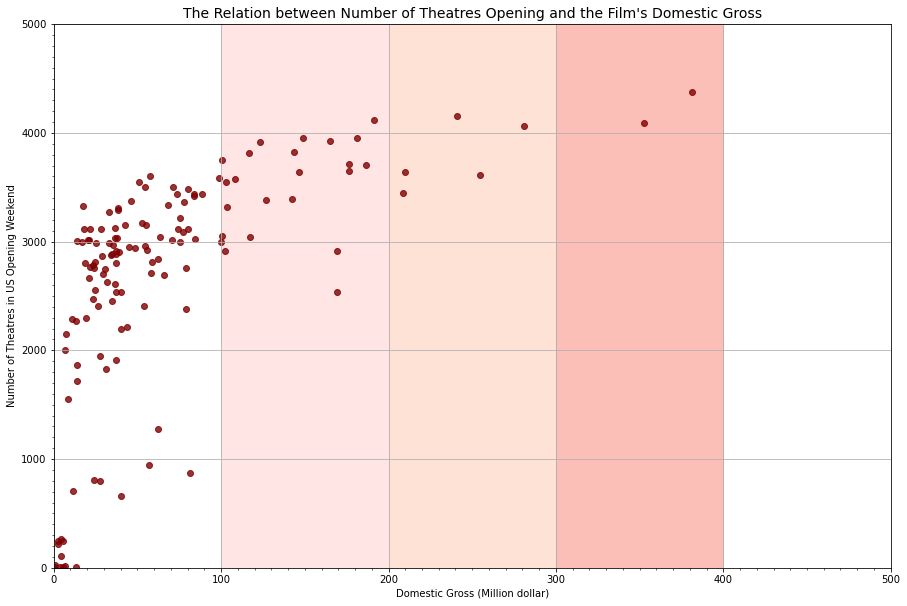

In [225]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

#处理空值，因为上映影院数量也是不能用平均填充的值，所以直接舍弃Number of Theatres in US Opening Weekend为空值的列
a = data.dropna(axis=0,subset=['Number of Theatres in US Opening Weekend'])

#处理含有’,‘的string，后续转换成数字
a['Number of Theatres in US Opening Weekend'][11] = a['Number of Theatres in US Opening Weekend'][11].replace(',',"")
y_2 = list(a['Number of Theatres in US Opening Weekend'].astype('float'))

#处理Domestic Gross，把资料类型从string转换成数字
for i in a['Domestic Gross']:
    try:
        i = pd.to_numeric(i)
    except:
        index = data[data['Domestic Gross'] == i].index
        data.drop(index,inplace=True)
x_2 = list(a['Domestic Gross'].astype('float'))


#设置plt的属性
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
plt.xlim(0,500)
plt.ylim(0,5000)

#设置辅助坐标
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.grid(linestyle='-')
plt.axvspan(xmin=100,xmax=200,color='mistyrose',alpha=0.9)
plt.axvspan(xmin=200,xmax=300,color='lightsalmon',alpha=0.3)
plt.axvspan(xmin=300,xmax=400,color='salmon',alpha=0.5)
#plt.axhspan(ymin=2000,ymax=3000,color='mistyrose',alpha=0.9)

#plt.axhspan(ymin=3000,ymax=4500,color='lightsalmon',alpha=0.5)
plt.title('The Relation between Number of Theatres Opening and the Film\'s Domestic Gross',fontsize=14)
plt.scatter(x_2,y_2,lw=1,c='maroon',alpha=0.8)
plt.xlabel('Domestic Gross (Million dollar)')
plt.ylabel('Number of Theatres in US Opening Weekend')
plt.show()

 **上图表示了domestic gross 和上映当周的影院数之间的关系；我们可以看到这两个变量大致呈现正向相关，也就是说上映的影院越多国内的票房收入就越多。其中，要使美国国内的票房突破1亿美元的话，上映当周必须要覆盖2000家影院才有机会；若想突破2亿美元票房，则必须覆盖3000家影院；而3亿元的票房需要覆盖超过4000家影院才能达成。**


### 第3题：请使用2007-2011年的数据，探索Comedy（在Story这一列中）和另一种你喜欢的电影类型的Worldwide Gross随年份的变化趋势。请做可视化，并对可视化结果进行简单的描述。（2分）
评分要点：（1）可视化是否正确；（2）构图等可视化元素是否合适；（3）可视化结果描述是否合理和到位。

In [191]:
#读入每年数据
data07 = pd.read_csv("data/Most Profitable Hollywood Stories - US 2007.csv")
data08 = pd.read_csv("data/Most Profitable Hollywood Stories - US 2008.csv")
data09 = pd.read_csv("data/Most Profitable Hollywood Stories - US 2009.csv")
data10 = pd.read_csv("data/Most Profitable Hollywood Stories - US 2010.csv")
data11 = pd.read_csv("data/Most Profitable Hollywood Stories - US 2011.csv")

#选择Journey and Return作为和comedy比较的story类型
data_list = [data07,data08,data09,data10,data11]
comedy_gross = []
jr_gross = []

#用groupby选出不同的stroy并把他的worldwide gross 加总 并计算平均
for data in data_list:
    a = data.groupby('Story').get_group('Comedy')
    b = data.groupby('Story').get_group('Journey and Return')
    a_wg = a['Worldwide Gross']
    b_wg = b['Worldwide Gross']
    a_wg = pd.to_numeric(a_wg)
    b_wg = pd.to_numeric(b_wg)
    comedy_gross.append(a_wg.mean())
    jr_gross.append(b_wg.mean())
    

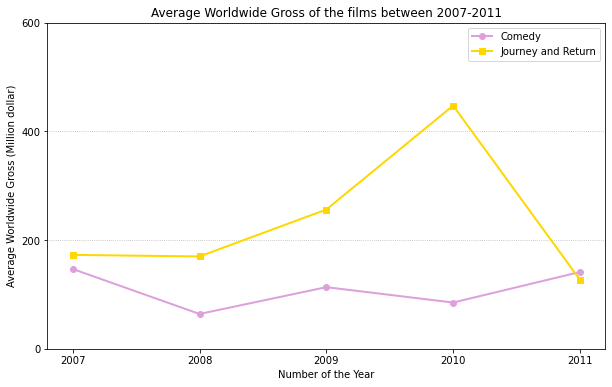

In [199]:
#定义x轴
x = [2007,2008,2009,2010,2011]

#选用折线图以呈现数值随着年份变化的趋势
plt.figure(figsize=(10,6))
plt.plot(x,comedy_gross,label="Comedy",marker='o',lw=2,color='plum')
plt.plot(x,jr_gross,label="Journey and Return",marker='s',lw=2,color='gold')


plt.xlabel('Number of the Year')
plt.ylabel('Average Worldwide Gross (Million dollar)')
plt.legend(loc='upper right')
plt.xticks(x)
plt.yticks([0, 200,400,600])
plt.title('Average Worldwide Gross of the films between 2007-2011')
plt.grid(True,axis="y",ls=":",color="black",alpha=0.3)
plt.show()

**由于票房的总量取决于两个因素**
1. **当年度此电影类型的发行数量**
2. **电影的票房收益**

**而题目应较为注重于电影的票房收益，所以要先对这两类型电影的worldwide gross进行平均处理，也就是说折线图上的y轴对应的数字是当类型在当年度的平均世界票房**
**从折线图中我们可以看到Journey and Return和Comedy两种类型的电影票房随着年度的走势变化并没有明显的趋向性，也就是说不存在一个增加另一个必然增加的趋向。然而可以观察到除了2011年喜剧片的平均国际票房稍高，五年来Journey and Return的电影平均国际票房几乎都高于喜剧类型电影。**


### 第4题：什么样的电影Profitablity（利润率，其值等于(Worldwide Gross-Budget)/Budget）更高？（4分）

温馨提示：（1）如果你认为不同年份的利润率不可以直接比，那你可能需要对利润率进行简单标准化，方法合理即可。（2）对于“什么样的电影利润率更高”的描述和回答，不一定要求全面，只需要按照你的喜好，选择几个点进行分析即可。

评分要点：（1）数据准备是否完备；（2）可视化是否正确；（3）构图等可视化元素是否合适；（4）可视化结果描述是否合理和到位。

**首先，观察columns的属性之后我决定以两个角度探讨什么样的电影利润率更高，首先从收入面探讨探讨是否观众较为喜欢（评分较高的电影）利润率较高（因为口耳相传下大家会更想去看）；再来是从成本面讨论发行商是商业制片厂还是独立制片场会不会影响利润率，而哪一种发行商发行的电影利润率较高。**
**p.s. 在跨年度比较利润率的部分，我认为跨年分的数据是可以直接比的，因为利润率是一个利润与成本的比值。换句话说票房和budget都是建立在当年环境下产生的数值，在除法的过程中已经消去了每一年通膨率的影响。**

In [270]:
d2 = pd.read_csv("data/Most Profitable Hollywood Stories - US 2010.csv")
d3 = pd.read_csv("data/Most Profitable Hollywood Stories - US 2009.csv")

#print(d3.columns)

d2.rename(columns={ 'Proftitability':'Profitability'}, inplace=True)
d3.rename(columns={ 'Market Profitability':'Profitability','Audience Score':'Audience  score'}, inplace=True)


d1 = data.dropna(subset=['Audience  score %','Profitability'])
d2 = d2.dropna(subset=['Audience  score','Profitability'])
d3 = d3.dropna(subset=['Audience  score','Profitability'])

d1['Audience  score %'].fillna('0',inplace=True)
d2['Audience  score'].fillna('0',inplace=True)
d3['Audience  score'].fillna('0',inplace=True)

d1.sort_values('Audience  score %', axis = 0, ascending = True,
                 inplace = True, na_position ='first')
d2.sort_values('Audience  score', axis = 0, ascending = True,
                 inplace = True, na_position ='first')
d3.sort_values('Audience  score', axis = 0, ascending = True,
                 inplace = True, na_position ='first')

a_score1 = []
a_score2 = []
a_score3 = []
profitability1 = []
profitability2 = []
profitability3 = []

#a_score.append(i['Audience  score %'])

for i in d1['Profitability']:
    try:
        i = i.replace('%','')
        i = float(i)
        profitability1.append(i)
    except:
        print("exception occurs")
        
for i in d1['Audience  score %']:
    try:  
        #i = i.replace('%','')
        i = int(i)
        a_score1.append(i)
    except:
        print("exception occurs")
        
         
        
for i in d2['Profitability']:
    try:
        i = i.replace('%','')
        i = float(i)
        profitability2.append(i)
    except:
        print("exception occurs")
        
for i in d2['Audience  score']:
    try:  
        #i = i.replace('%','')
        i = int(i)
        a_score2.append(i)
    except:
        print("exception occurs")
        
    e
        
for i in d3['Profitability']:
    try:
        i = i.replace('%','')
        i = float(i)
        profitability3.append(i)
    except:
        print("exception occurs")
        
for i in d3['Audience  score']:
    try:  
        #i = i.replace('%','')
        i = int(i)
        a_score3.append(i)
    except:
        print("exception occurs")
    
profitability1.pop()


exception occurs


/var/folders/hc/96sg9mzd0sx0czqljw5xt9h40000gn/T/ipykernel_63584/1141556590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Audience  score %'].fillna('0',inplace=True)
/var/folders/hc/96sg9mzd0sx0czqljw5xt9h40000gn/T/ipykernel_63584/1141556590.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.sort_values('Audience  score %', axis = 0, ascending = True,


171.95

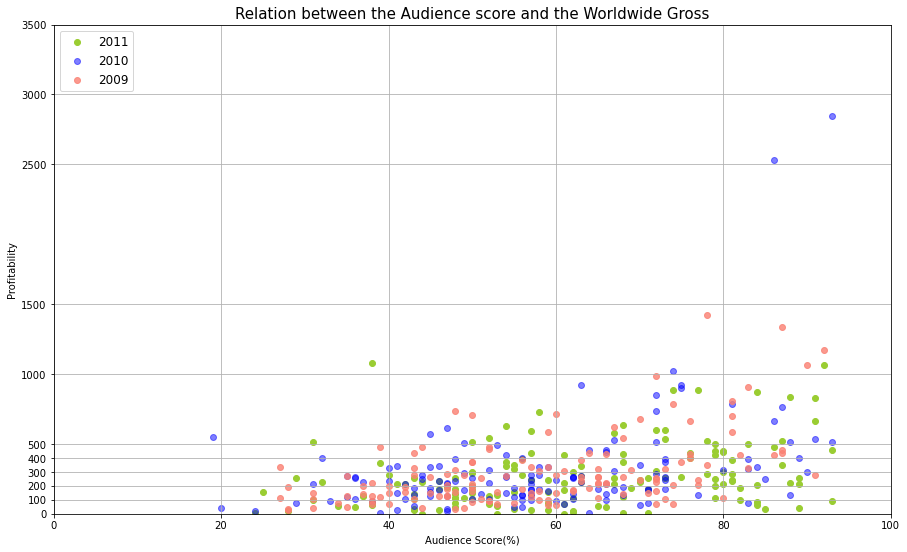

In [275]:
plt.figure(figsize=(15,9))
plt.grid(True,linestyle='-')
plt.xlim(0,100)
plt.ylim(0,3000)

plt.xticks([0,20,40,60,80,100])
plt.yticks([0,100,200,300,400,500,1000,1500,2500,3000,3500])

plt.xlabel('Audience Score(%)')
plt.ylabel('Profitability')
plt.title('Relation between the Audience score and the Worldwide Gross',fontsize=15)

plt.scatter(a_score1,profitability1,color="yellowgreen",label='2011',lw=1)
plt.scatter(a_score2,profitability2,color="blue",label='2010',alpha=0.5,lw=1)
plt.scatter(a_score3,profitability3,color="salmon",label='2009',alpha=0.8,lw=1)

plt.legend(loc='upper left',fontsize=12)


**上图探讨了观众评分与国际票房之间的关系，不同颜色是不同的年度。可以观察到三年中评分与这部电影的利润率都具有一些正向关系，特别是2010年有两部电影利润率超过了2500倍，而这两部电影的评分都超过了八十。然而也不能从这部电影的评分去直接推论电影的利润率高低，图中离散点表明有些电影虽然评分不到40，却可以达到超过500倍，甚至上千倍的利润率；也有很多同分的电影利润率相差甚远。我认为可以推论观众的评分虽和利润率有关系，比如评分高（超过80）的电影整体利润率稍高，但也存在很多同分但利润率天差地远的案例，或者利润率差不多但一个评分在前百分之二十另一个却在后百分之二十的状况。因此不能以评分直接推断一部电影的利润率好坏。**

In [276]:
d12 = data.dropna(subset=['Lead Studio','Profitability'])
d22 = d2.dropna(subset=['Lead Studio','Profitability'])
d32 = d3.dropna(subset=['Lead Studio','Profitability'])

independent1 = d12.groupby('Lead Studio').get_group('Independent')
independent2 = d22.groupby('Lead Studio').get_group('Independent')
independent3 = d32.groupby('Lead Studio').get_group('Independent')


independent_pro1 = []
non_in_pro1 = []
for i in independent1.Profitability:
    try:
        independent_pro1.append(float(i.replace('%','')))
    except:
        print('exception occurs')

non_in1 = d12['Lead Studio'].unique()
non_in1 = np.delete(non_in1,0)

for studio in non_in1:
    a = d12.groupby('Lead Studio').get_group(studio)
    for i in a.Profitability:
        non_in_pro1.append(float(i.replace('%','')))
        
        
independent_pro2 = []
non_in_pro2 = []
for i in independent2.Profitability:
    try:
        independent_pro2.append(float(i.replace('%','')))
    except:
        print('exception occurs')

non_in2 = d22['Lead Studio'].unique()
#non_in2 = np.delete(non_in2,0)

for studio in non_in2:
    a = d22.groupby('Lead Studio').get_group(studio)
    for i in a.Profitability:
        non_in_pro2.append(float(i.replace('%','')))
        
        
independent_pro3 = []
non_in_pro3 = []
for i in independent3.Profitability:
    try:
        independent_pro3.append(float(i.replace('%','')))
    except:
        print('exception occurs')

non_in3 = d32['Lead Studio'].unique()
#non_in3 = np.delete(non_in3,0)

for studio in non_in3:
    a = d32.groupby('Lead Studio').get_group(studio)
    for i in a.Profitability:
        non_in_pro3.append(float(i.replace('%','')))


In [277]:
prob_list = [non_in_pro1,independent_pro1,non_in_pro2,independent_pro2,non_in_pro3,independent_pro3]


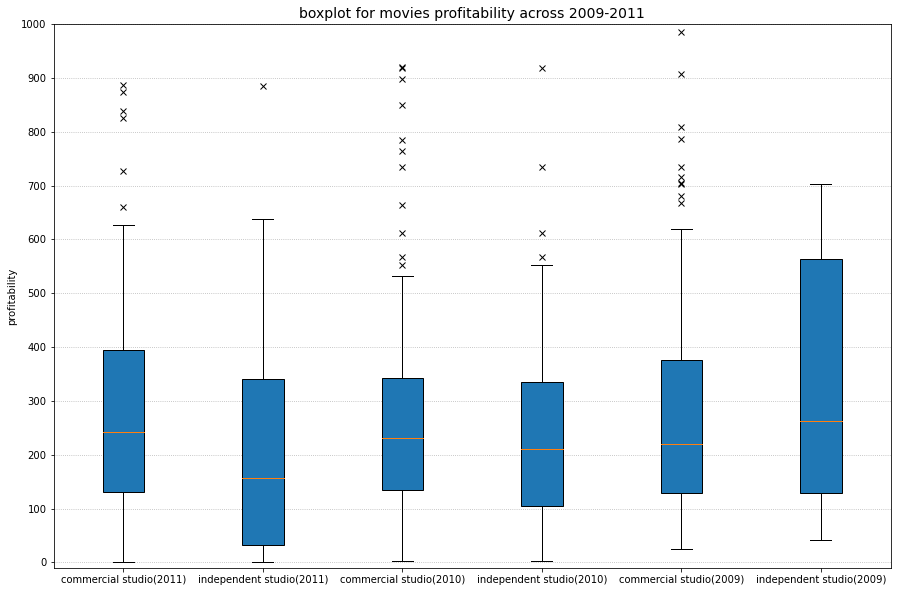

In [278]:
labels=['commercial studio(2011)','independent studio(2011)','commercial studio(2010)','independent studio(2010)','commercial studio(2009)','independent studio(2009)']
plt.figure(figsize=(15,10))
plt.title("boxplot for movies profitability across 2009-2011",fontsize=14)
plt.ylim(-10,1000)
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.grid(axis='y',ls=":")
plt.ylabel("profitability")
plt.boxplot(prob_list,
            whis=1,
            widths=0.3,
            sym="x",
            labels = labels,
            patch_artist=True
            )
plt.show()


**最后是商业制片厂发行的电影与独立制片场发行的电影利润率比较，横跨了2009-2011三年的比较可以让我们发现除了2009年，商业制片厂制作的电影不论是在中位数利润率还是上下四分位数上都于高于独立制片场。即使是独立电影中位数较高的2019年，中位数与后四分位数上也没有非常大的差异。可以推论由商业制片商发行的电影利润率较高，再者，能够观察到三年来商业片厂的利润率中位数雨后四分位数都维持在差不多的位置。推测是因为这些制片商本来就以获得较高利润为目的在选择拍摄的电影，因此会以商业方法选择能够达到一定的利润率的电影发行，因此能保证每年的利润率较高且维持在差不多的水平。**